# 😷 Face Mask Detection System using CNN & OpenCV

This project uses a Convolutional Neural Network (CNN) to detect whether a person in an image is **wearing a mask** or **not**, using a trained model and OpenCV face detection.

---

## 🎯 Objective:
Classify whether a detected face is wearing a mask or not.

## 🔧 Tech Stack:
- OpenCV (Haar Cascades)
- TensorFlow/Keras (CNN)
- Python
- Google Colab

---

## 📂 Dataset:
We use a labeled dataset with two folders:
- `with_mask`
- `without_mask`
-🔗 **Link**: [Dataset](https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data)
---

## ⚙️ Features:
- Face detection with Haar cascades
- CNN model to classify mask presence
- Image-based mask detection

---

### 👨‍💻 Project By: [Kailash Kumar](https://github.com/kailash-py)

🔗 **GitHub**: [github.com/kailash-py](https://github.com/kailash-py)

In [2]:
!pip install opencv-python
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from google.colab import files


In [3]:
uploaded = files.upload()  #Upload archive.zip


Saving archive.zip to archive.zip


In [5]:
!unzip archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [8]:
data_dir = "data"
categories = ["with_mask", "without_mask"]

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)  # 0 or 1

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        try:
            resized = cv2.resize(img, (100, 100))
            data.append(resized)
            labels.append(class_num)
        except:
            pass

X = np.array(data) / 255.0
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
#This May Take Time

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 95s 493ms/step - accuracy: 0.6827 - loss: 0.5895 - val_accuracy: 0.8968 - val_loss: 0.2621
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 135s 456ms/step - accuracy: 0.8802 - loss: 0.2996 - val_accuracy: 0.8842 - val_loss: 0.2770
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 147s 481ms/step - accuracy: 0.8896 - loss: 0.2496 - val_accuracy: 0.9186 - val_loss: 0.2077
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 142s 481ms/step - accuracy: 0.9099 - loss: 0.2225 - val_accuracy: 0.9133 - val_loss: 0.2269
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 140s 468ms/step - accuracy: 0.9160 - loss: 0.2032 - val_accuracy: 0.9153 - val_loss: 0.2113
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 139s 454ms/step - accuracy: 0.9168 - loss: 0.1832 - val_accuracy: 0.9279 - val_loss: 0.1869
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 147s 479ms/step - accuracy: 0.9390 - loss: 0.1540 - val_accuracy: 0.9219 - val_loss: 0.1989
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 138s 457ms/step - accuracy: 0.9409 - 

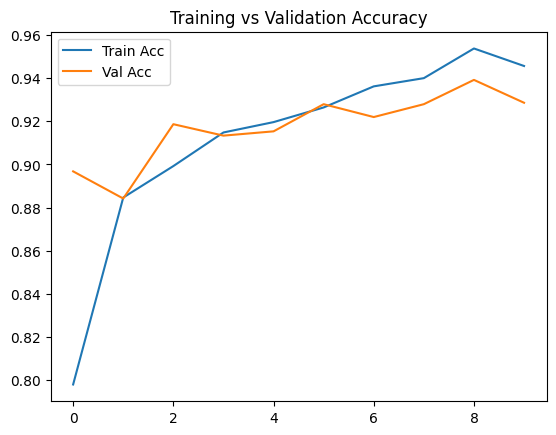

In [21]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


Test

---



In [22]:
#Upload jpg/png image
from google.colab import files
uploaded = files.upload()


Saving pexels-sharon-snider-4400496.jpg to pexels-sharon-snider-4400496 (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


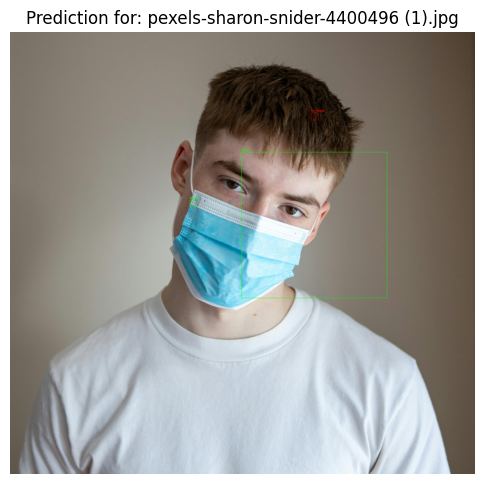

In [23]:
for file in uploaded.keys():
    img = cv2.imread(file)
    img_copy = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        try:
            face_resized = cv2.resize(face, (100, 100)) / 255.0
            face_input = np.expand_dims(face_resized, axis=0)

            prediction = model.predict(face_input)[0][0]
            label = "Mask" if prediction < 0.5 else "No Mask"
            color = (0,255,0) if prediction < 0.5 else (0,0,255)

            cv2.rectangle(img_copy, (x, y), (x+w, y+h), color, 2)
            cv2.putText(img_copy, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        except:
            pass

    # Show result
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Prediction for: {file}")
    plt.show()


In [14]:
from google.colab import files
uploaded = files.upload()

Saving R.jpg to R.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


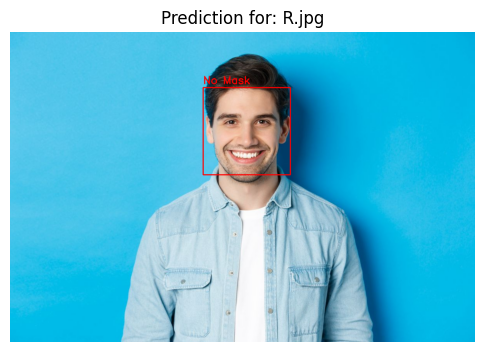

In [15]:
for file in uploaded.keys():
    img = cv2.imread(file)
    img_copy = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        try:
            face_resized = cv2.resize(face, (100, 100)) / 255.0
            face_input = np.expand_dims(face_resized, axis=0)

            prediction = model.predict(face_input)[0][0]
            label = "Mask" if prediction < 0.5 else "No Mask"
            color = (0,255,0) if prediction < 0.5 else (0,0,255)

            cv2.rectangle(img_copy, (x, y), (x+w, y+h), color, 2)
            cv2.putText(img_copy, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        except:
            pass

    # Show result
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Prediction for: {file}")
    plt.show()
